# COMP 7150 Assignment 4

---

**How each problem is graded**

This is a general guideline.  There might be some variant for a specific problem.

* Answering the question in English: 25%
    + Thorough answering the question, explaning the findings, discussing the comparison: 10-25%
    + Not answering the question in English: 0%.
    + Note: An answer is written in English to address a specific question. The answer must come first.  
* Code: 50%
    + Code is correct: 50%
    + Code is correct, but missing some minor elements: 25-40%
    + Incorrect solution, but make an effort: 10%-25%
    + Empty: 0% 
    + Note: code is not an answer. Code shows how you get an answer.  Code comes after an answer.
* Explanation of code: 10%
    + Concise English explanation of solution/code: 10%
    + No explanation: 0%
* Testing: 15%
    + Providing adequate testing of code: 15%
    + Code operational but does not show how the answer(s) were generated: 5%
    + Code not runnable or no testing: 0%


**How to turn in your assignment**

+ Export your notebook to an HTML file.
+ Upload it to the appropriate folder in Assignments on Canvas.

#### Dataset

The dataset you'll used for this assignment is diabetes.csv

The target variable is Outcome. The other 8 variables are features.

This dataset was collected from pregnant women.  Each row corresponds to a person.  An Outcome of 0 means the person is not diagnosed with diabetes.  An Outcome of 1 means the person is diagnosed with diabetes.

**Each problem is worth 20 points.**

In [3]:
import pandas

diabetes = pandas.read_csv('../Datasets/diabetes.csv')

In [4]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


---

**Problem 1**

Use the approach that is similar to my solution to Problem 8 of the midterm exam, to create a new column called "AgeGroup", which has the following values:

* Group1 - under 25 years old
* Group2 - from 25 to under 30 years old
* Group3 - from 30 to under 40 years old
* Group4 - from 40 to under 50 years old
* Group5 - from 50 years old and up



ANSWER:

We can apply a function on a dataframe (specify axis=1) or on a series.


In [7]:
# apply on a dataframe
def f(row):
    if row['Age'] < 25:
        return 'Group1'
    else:
        return 'NA'

diabetes['AgeGroup'] = diabetes.apply(f, axis=1)



In [12]:
# apply on a series
def f(value):
    if value < 25:
        return 'Group1'
    elif 25 <= value < 30:
        return 'Group2'
    elif 30 <= value < 40:
        return 'Group3'
    elif 40 <= value < 50:
        return 'Group4'
    else:
        return 'Group5'
diabetes['AgeGroup'] = diabetes['Age'].apply(f)

In [16]:
# diabetes.sample(5)

---

**Problem 2**

Compare both analytically/numerically and visually the BMI of different age groups, which you created from the previous problem.

ANSWER:

Numerical analyses give must precise values, mostly for one statistics:  average.

Visual analyses can be imprecise, but they show us a broader picture (beyond the averages).

In [18]:
diabetes.groupby('AgeGroup').mean()[['BMI']]

,BMI
AgeGroup,
Group1,30.011416
Group2,33.096610
Group3,32.472121
Group4,34.617797
Group5,30.302247


We found that 
+ Group1 has the lowest BMI.
+ Group5 has the second lowest BMI.
+ Group4 has the highest BMI.

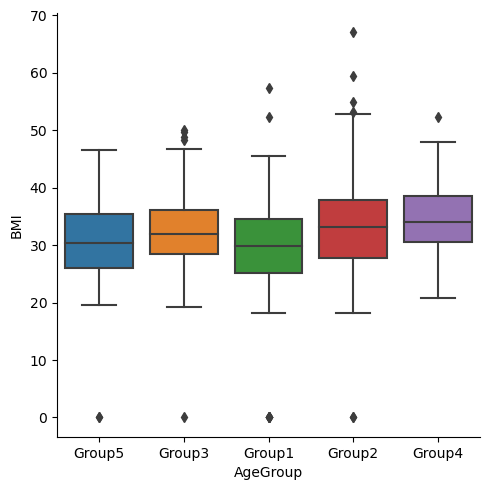

In [24]:
import seaborn
from matplotlib import pyplot

seaborn.catplot(data=diabetes, x='AgeGroup', y='BMI', kind='box')
pyplot.show()

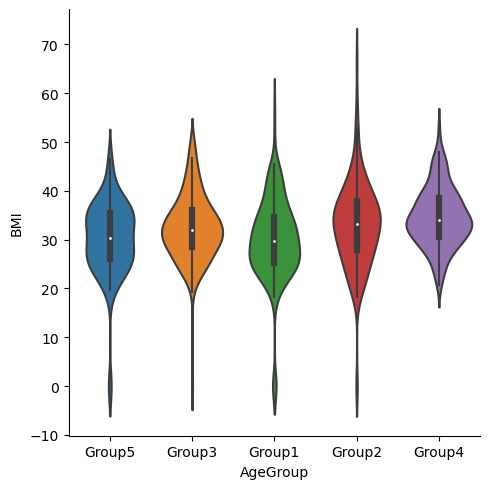

In [25]:
seaborn.catplot(data=diabetes, x='AgeGroup', y='BMI', kind='violin')
pyplot.show()

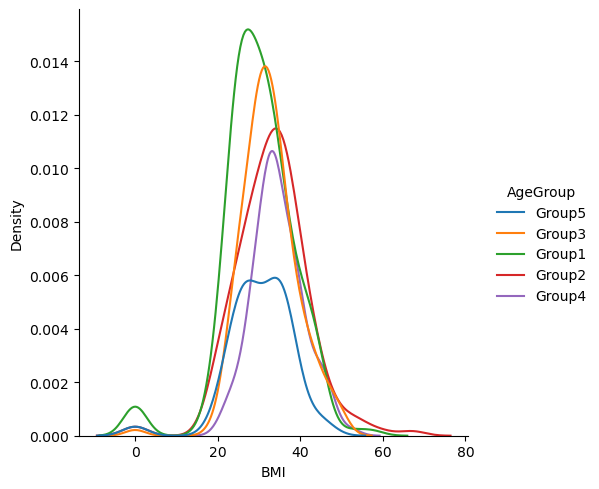

In [26]:
seaborn.displot(data=diabetes, x='BMI', hue='AgeGroup', kind='kde')
pyplot.show()

Looking at the distribution reveals that there're missing values.

In [27]:
diabetes[diabetes['BMI']<1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
9,8,125,96,0,0,0.0,0.232,54,1,Group5
49,7,105,0,0,0,0.0,0.305,24,0,Group1
60,2,84,0,0,0,0.0,0.304,21,0,Group1
81,2,74,0,0,0,0.0,0.102,22,0,Group1
145,0,102,75,23,0,0.0,0.572,21,0,Group1
371,0,118,64,23,89,0.0,1.731,21,0,Group1
426,0,94,0,0,0,0.0,0.256,25,0,Group2
494,3,80,0,0,0,0.0,0.174,22,0,Group1
522,6,114,0,0,0,0.0,0.189,26,0,Group2
684,5,136,82,0,0,0.0,0.640,69,0,Group5


---

**Problem 3**

Create a new column for "BMILevel", which has values: UnderWeight, Healthy, Overweight, Obesity, Class3Obesity, based on the information from this website:

https://www.cdc.gov/obesity/basics/adult-defining.html


ANSWER:

We can use the same technique (apply a function on a series) to construct BMILevel.


In [33]:
diabetes['BMILevel'] = pandas.cut(diabetes['BMI'], 
           bins=[-1, 18.5, 24.9, 29.9, 40, 100], 
           labels=['Underweight', 'Healthy', 'Overweight', 'Obesity', 'Class3O0besity'])

In [34]:
diabetes.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup,BMILevel
531,0,107,76,0,0,45.3,0.686,24,0,Group1,Class3O0besity
385,1,119,54,13,50,22.3,0.205,24,0,Group1,Healthy
218,5,85,74,22,0,29.0,1.224,32,1,Group3,Overweight
684,5,136,82,0,0,0.0,0.640,69,0,Group5,Underweight
152,9,156,86,28,155,34.3,1.189,42,1,Group4,Obesity


Summary:
+ We can apply a function on a series or a dataframe to convert numerical features into categorical features.

+ We can also use "cut" or "qcut" to convert numerical features into categorical features.

---
**Problem 4**


Compare both analytically/numerically and visually the Glucose values of different pairs of age groups and BMI levels, which you created from the previous problems.

ANSWER:

We can use either groupby or pivot table to analyze/compare Glucose for each pair of age groups and BMI levels.


In [36]:
diabetes.groupby(['AgeGroup','BMILevel']).mean()[['Glucose']]

Glucose
AgeGroup BMILevel                  
Group1   Underweight      94.625000
         Healthy         103.975610
         Overweight      106.548387
         Obesity         113.392857
         Class3O0besity  130.291667
Group2   Underweight      98.750000
         Healthy          96.318182
         Overweight      113.705882
         Obesity         117.079545
         Class3O0besity  140.758621
Group3   Underweight     115.000000
         Healthy         113.941176
         Overweight      118.000000
         Obesity         132.694118
         Class3O0besity  119.380952
Group4   Underweight            NaN
         Healthy         109.500000
         Overweight      121.722222
         Obesity         123.723684
         Class3O0besity  136.500000
Group5   Underweight     130.500000
         Healthy         127.375000
         Overweight      138.541667
         Obesity         143.162791
         Class3O0besity  160.000000

In [39]:
diabetes.pivot_table(index='AgeGroup', columns='BMILevel', values='Glucose', aggfunc='mean').round(1)

BMILevel,Underweight,Healthy,Overweight,Obesity,Class3O0besity
AgeGroup,,,,,
Group1,94.6,104.0,106.5,113.4,130.3
Group2,98.8,96.3,113.7,117.1,140.8
Group3,115.0,113.9,118.0,132.7,119.4
Group4,NaN,109.5,121.7,123.7,136.5
Group5,130.5,127.4,138.5,143.2,160.0


Visually, we can use catplot (with kind=box)

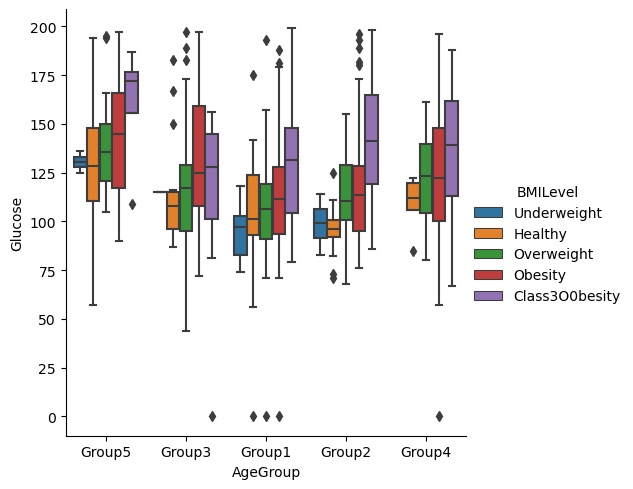

In [41]:
seaborn.catplot(data=diabetes, x='AgeGroup', y='Glucose', hue='BMILevel', kind='box')
pyplot.show()

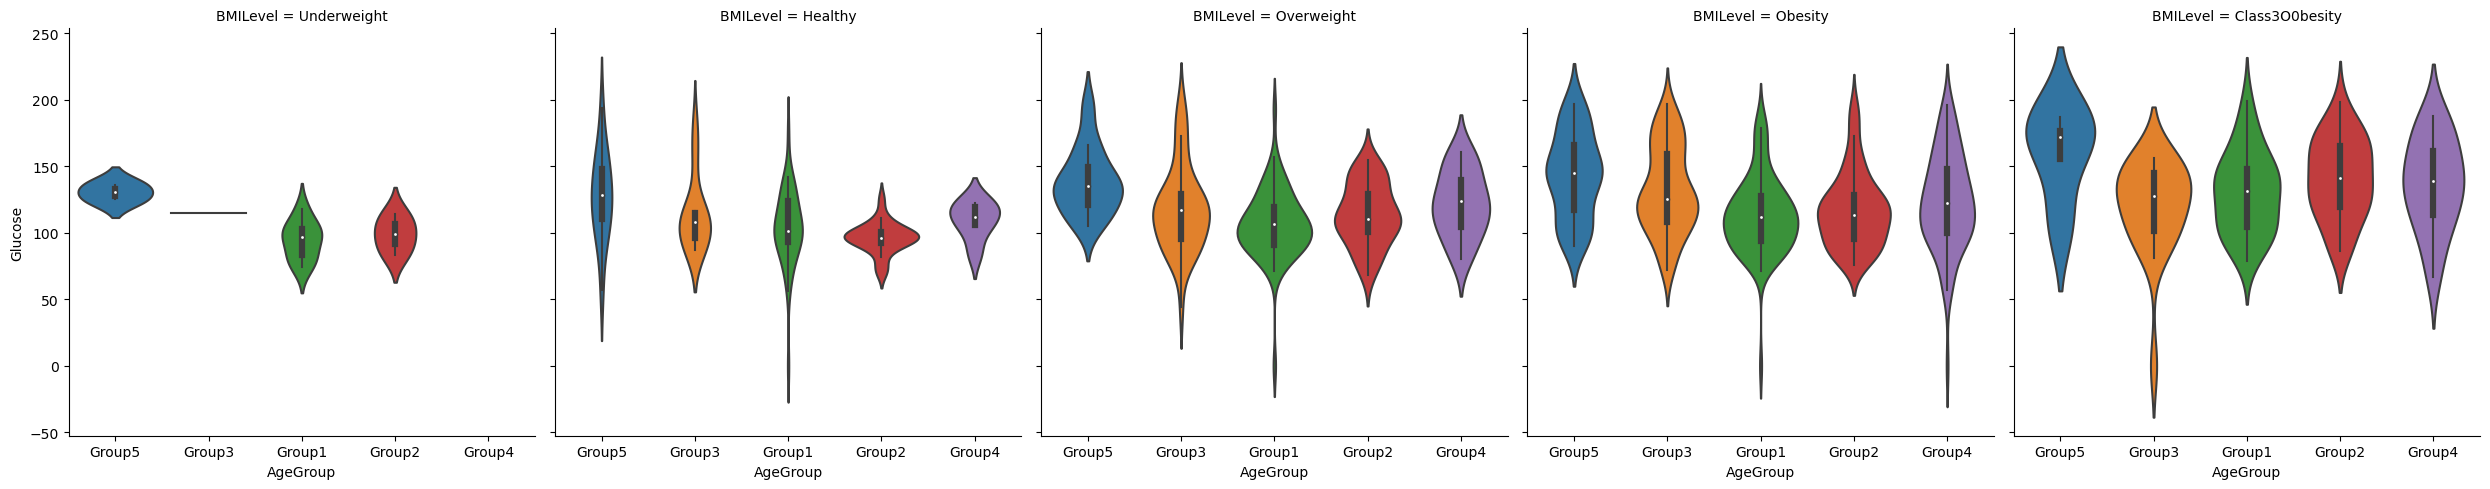

In [44]:
seaborn.catplot(data=diabetes, x='AgeGroup', y='Glucose', col='BMILevel', kind='violin')
pyplot.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


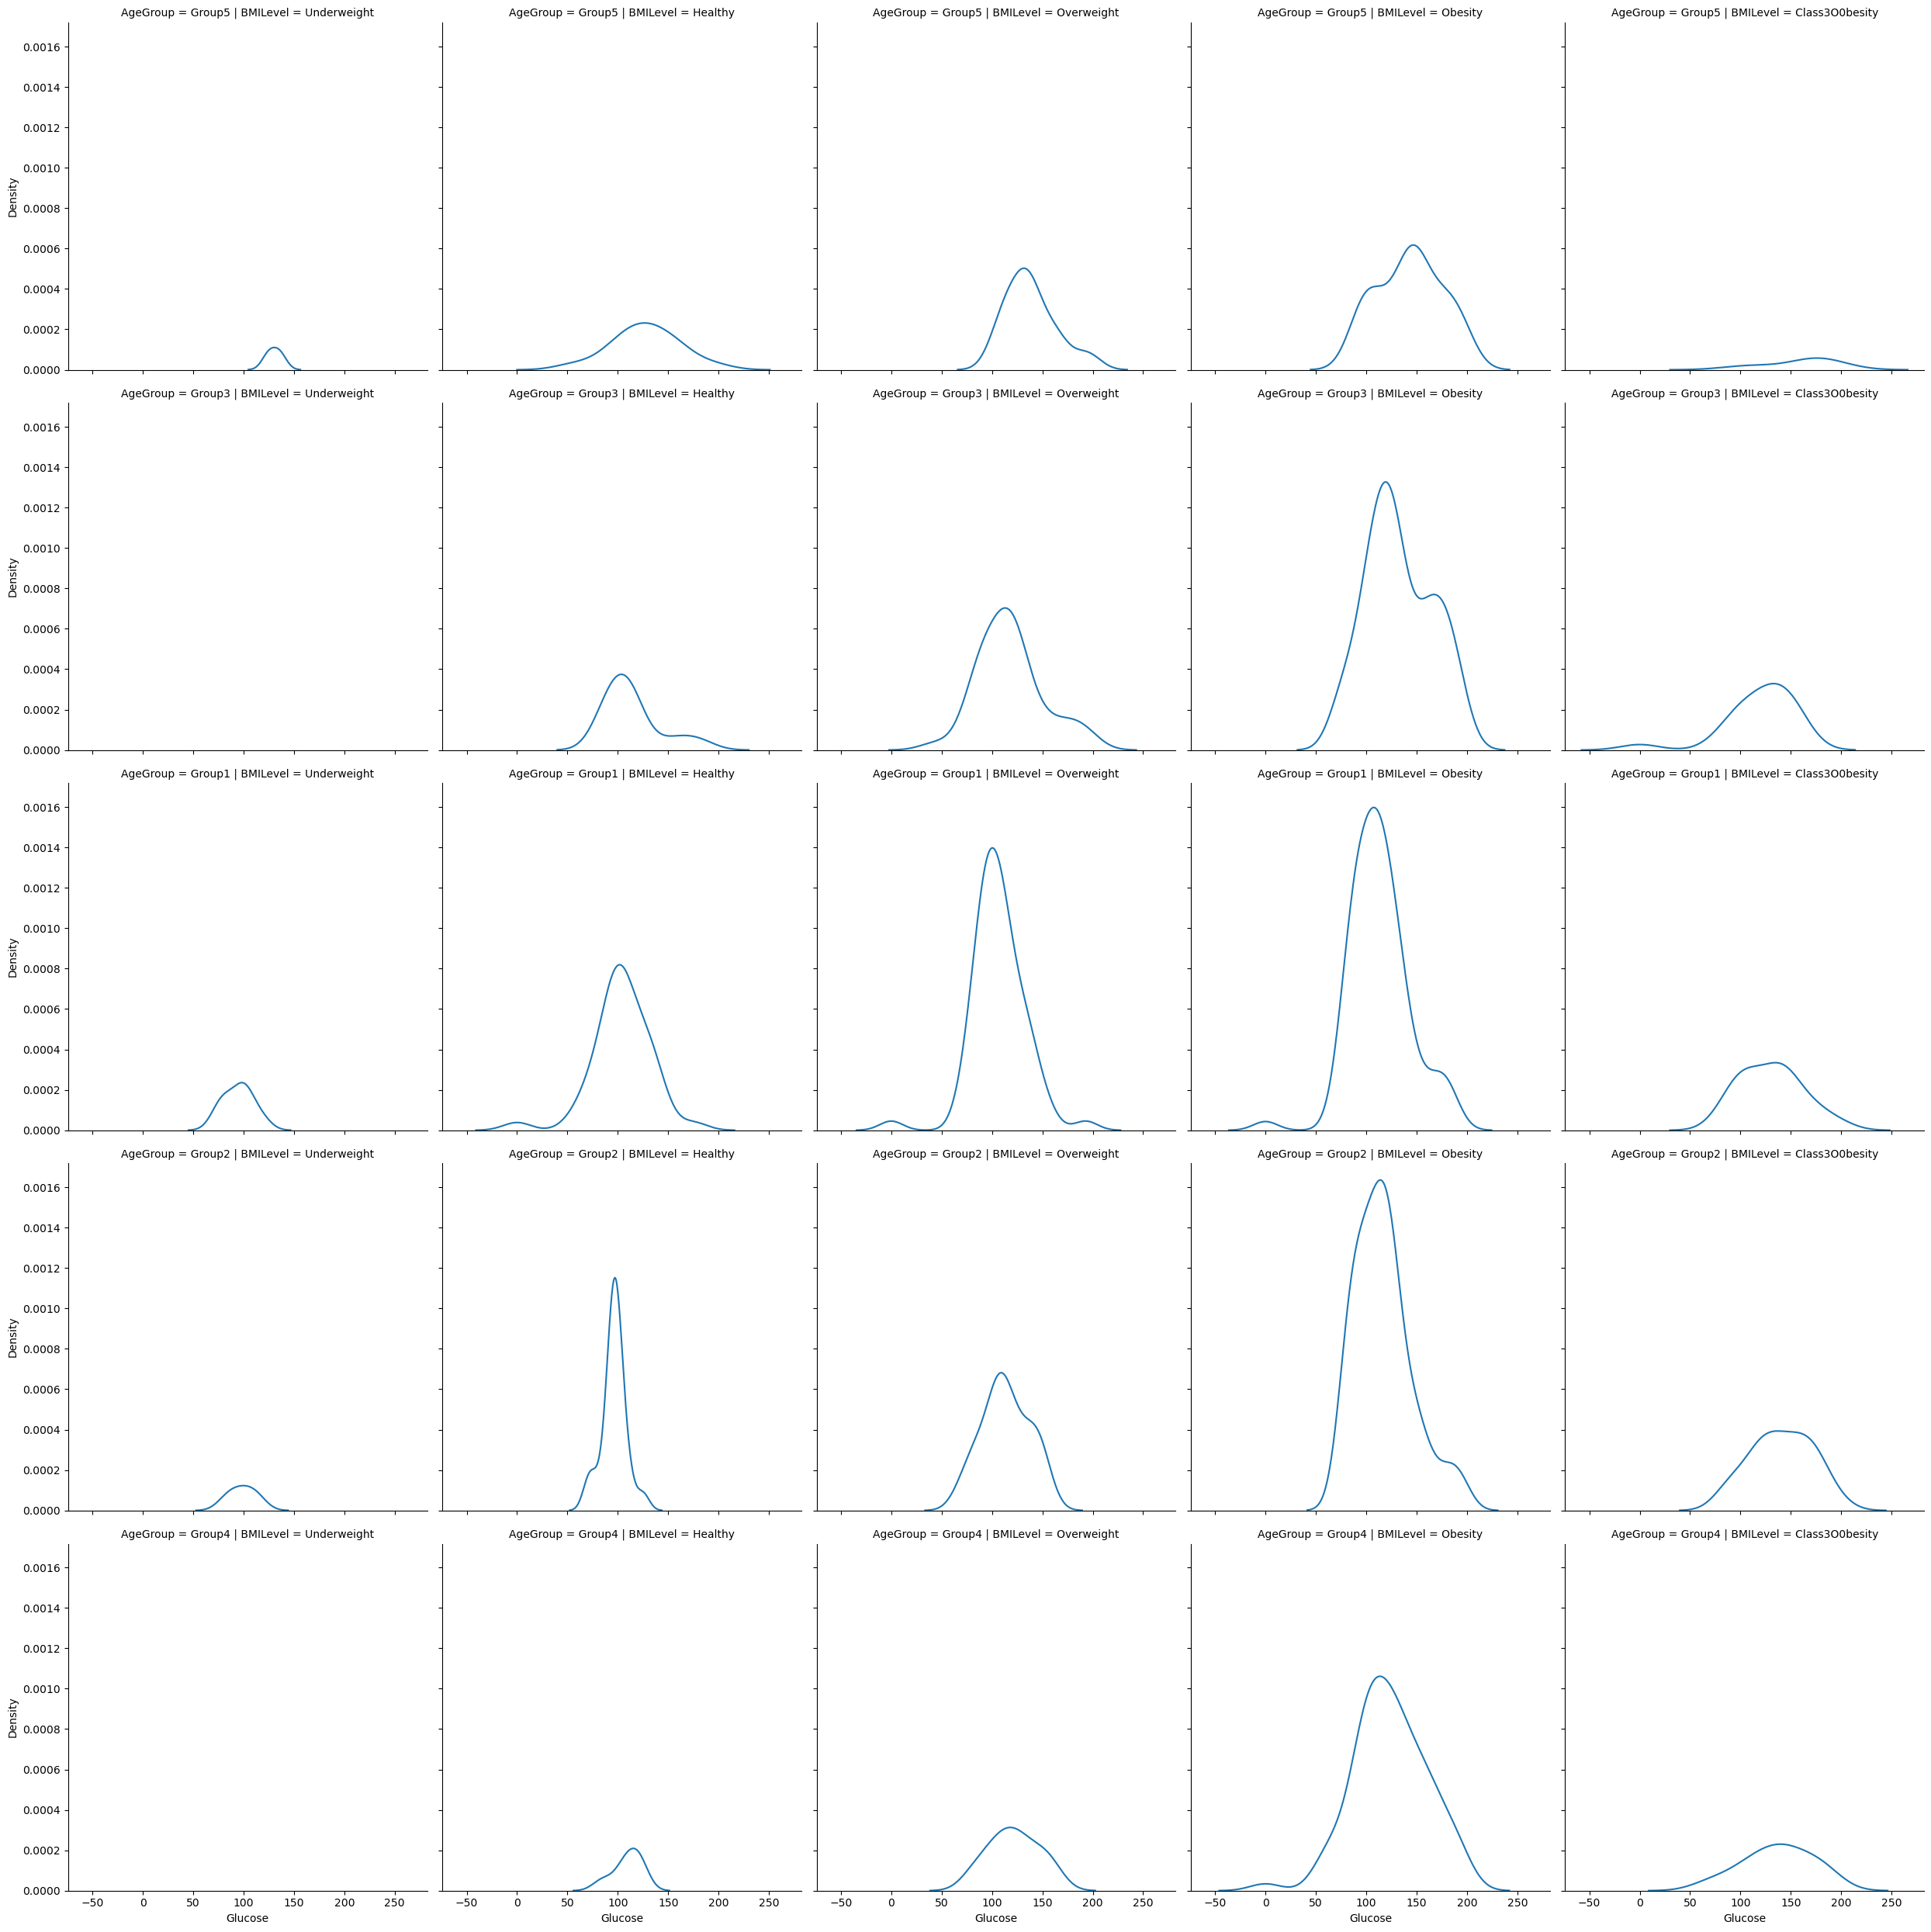

In [50]:
seaborn.displot(data=diabetes, x='Glucose', col='BMILevel', row='AgeGroup', kind='kde')
pyplot.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


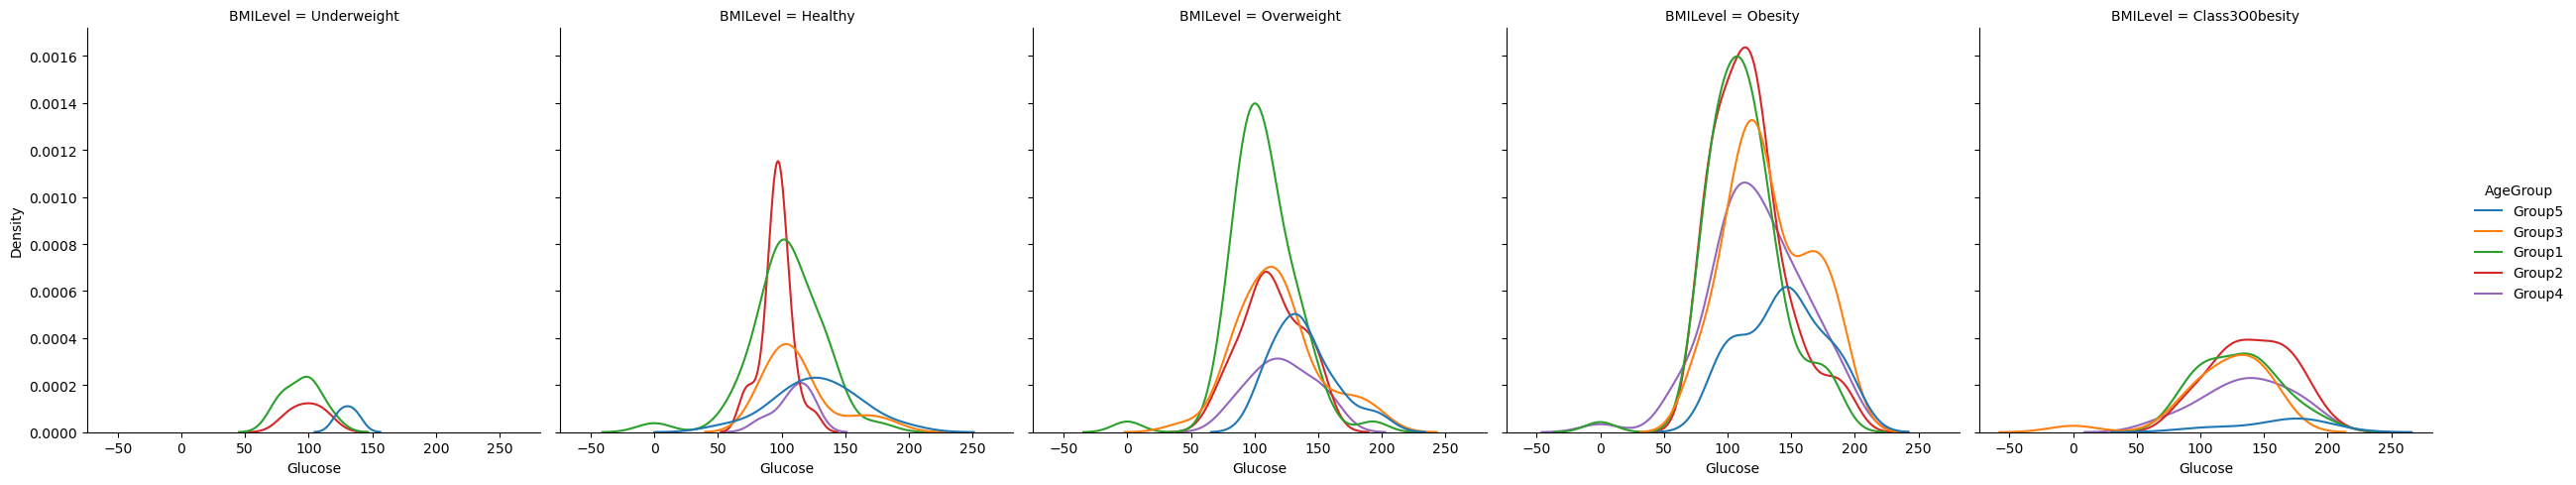

In [51]:
seaborn.displot(data=diabetes, x='Glucose', col='BMILevel', hue='AgeGroup', kind='kde')
pyplot.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


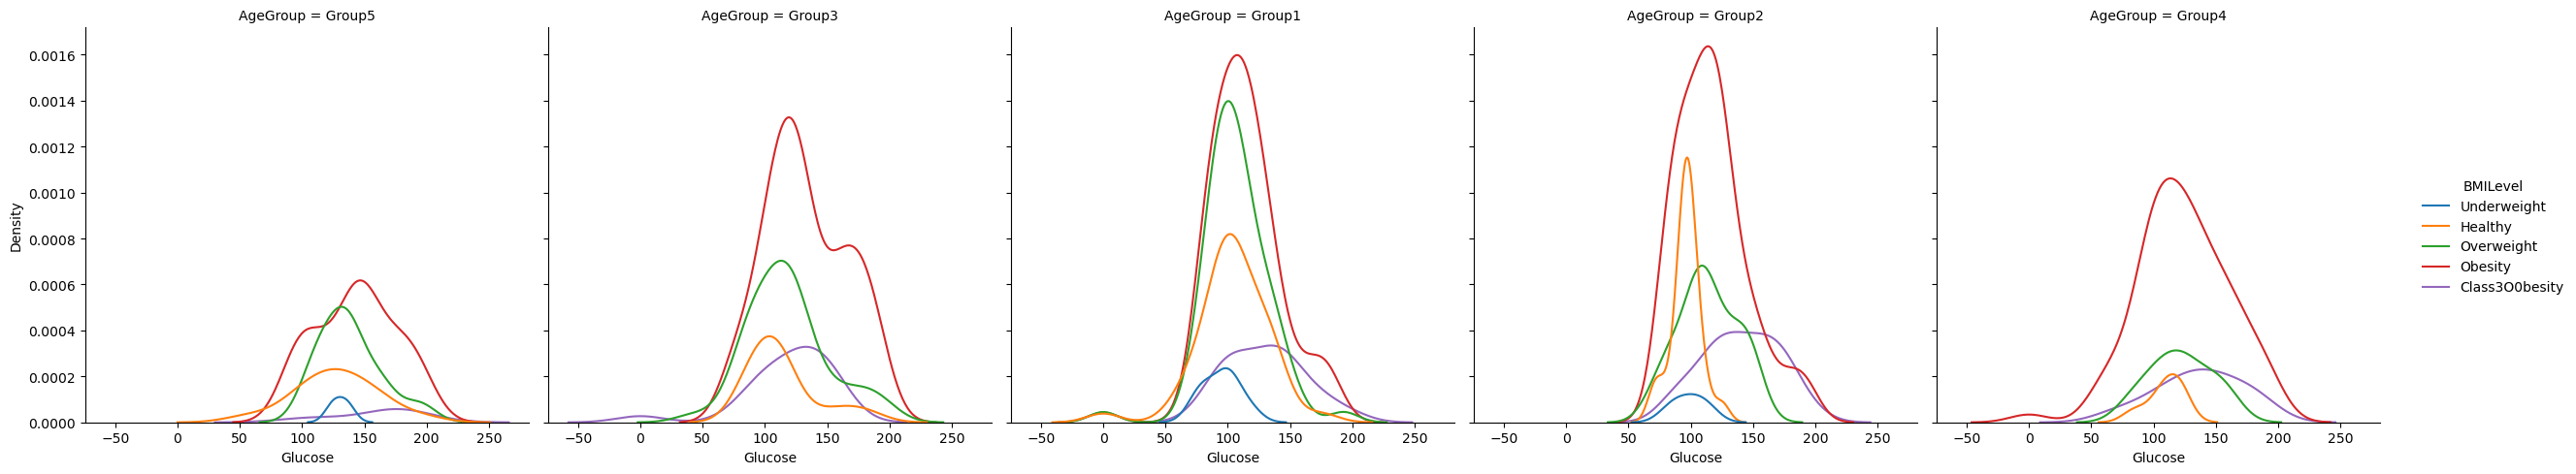

In [52]:
seaborn.displot(data=diabetes, x='Glucose', hue='BMILevel', col='AgeGroup', kind='kde')
pyplot.show()

---

**Problem 5**

Create a set of features that will be used for modeling.  These features are:
* Blood pressure
* Insulin
* Age group
* BMI level

Use standard scaling to rescale blood pressure and insulin.

Convert the categorical features age group and BMI level into numerical features.



ANSWER

In [55]:
diabetes.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup,BMILevel
0,6,148,72,35,0,33.6,0.627,50,1,Group5,Obesity


In [73]:
X = diabetes[['BloodPressure', 'Insulin', 'AgeGroup', 'BMILevel']].copy()
X.sample(3)

,BloodPressure,Insulin,AgeGroup,BMILevel
16,84,230,Group3,Class3O0besity
223,60,190,Group5,Overweight
9,96,0,Group5,Underweight


Blood pressure and insulin have different scales.

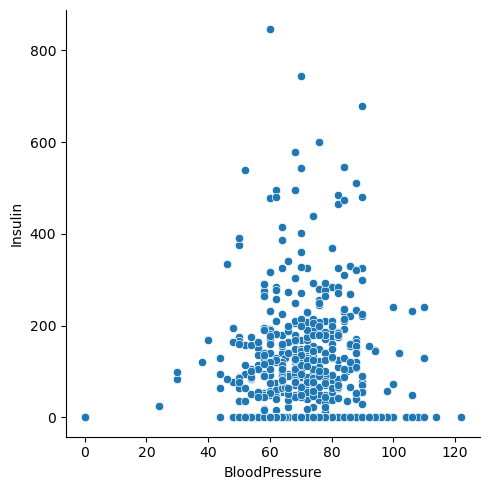

In [74]:
seaborn.relplot(data=diabetes, x='BloodPressure', y='Insulin')
pyplot.show()

We learn how to scale using MinMax scaling.  This method scale a feature into the range of [0, 1].

Standard scale scales the data into a range with mean 0 and standard deviation 1.


In [75]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [76]:
mscaler = MinMaxScaler()
sscaler = StandardScaler()

In [77]:
X2 = mscaler.fit_transform(X[['BloodPressure', 'Insulin']])
X2

array([[0.59016393, 0.        ],
       [0.54098361, 0.        ],
       [0.52459016, 0.        ],
       ...,
       [0.59016393, 0.13238771],
       [0.49180328, 0.        ],
       [0.57377049, 0.        ]])

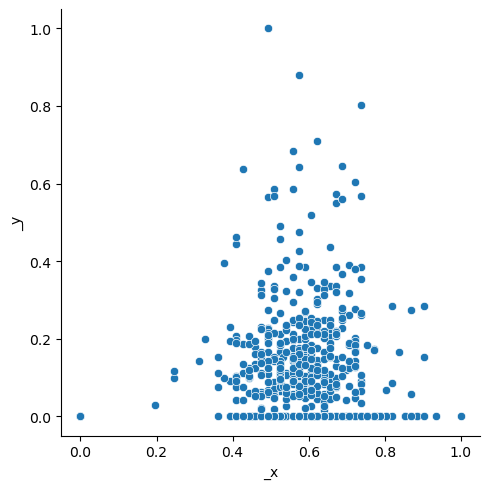

In [78]:
seaborn.relplot(x=X2[:, 0], y=X2[:, 1])
pyplot.show()

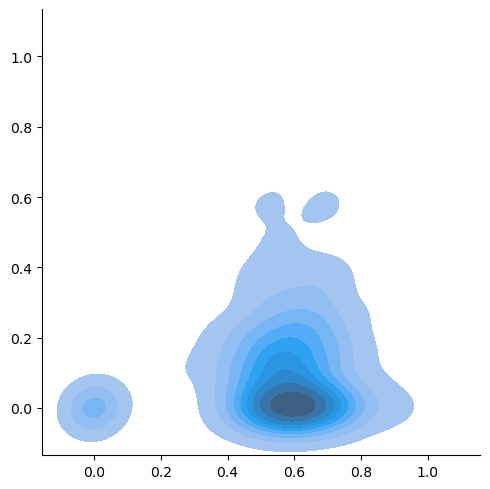

In [79]:
seaborn.displot(x=X2[:, 0], y=X2[:, 1], kind='kde', fill=True)
pyplot.show()

In [80]:
X3 = sscaler.fit_transform(X[['BloodPressure', 'Insulin']])
X3

array([[ 0.14964075, -0.69289057],
       [-0.16054575, -0.69289057],
       [-0.26394125, -0.69289057],
       ...,
       [ 0.14964075,  0.27959377],
       [-0.47073225, -0.69289057],
       [ 0.04624525, -0.69289057]])

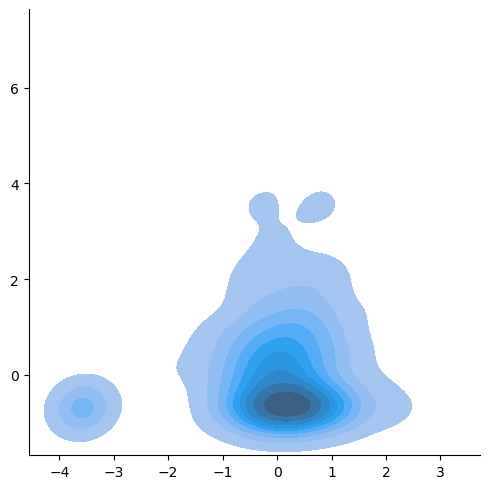

In [81]:
seaborn.displot(x=X3[:, 0], y=X3[:, 1], kind='kde', fill=True)
pyplot.show()

In [82]:
X[['BloodPressure', 'Insulin']] = sscaler.fit_transform(X[['BloodPressure', 'Insulin']])

In [83]:
X

,BloodPressure,Insulin,AgeGroup,BMILevel
0,0.149641,-0.692891,Group5,Obesity
1,-0.160546,-0.692891,Group3,Overweight
2,-0.263941,-0.692891,Group3,Healthy
3,-0.160546,0.123302,Group1,Overweight
4,-1.504687,0.765836,Group3,Class3O0besity
...,...,...,...,...
763,0.356432,0.870031,Group5,Obesity
764,0.046245,-0.692891,Group2,Obesity
765,0.149641,0.279594,Group3,Overweight
766,-0.470732,-0.692891,Group4,Obesity


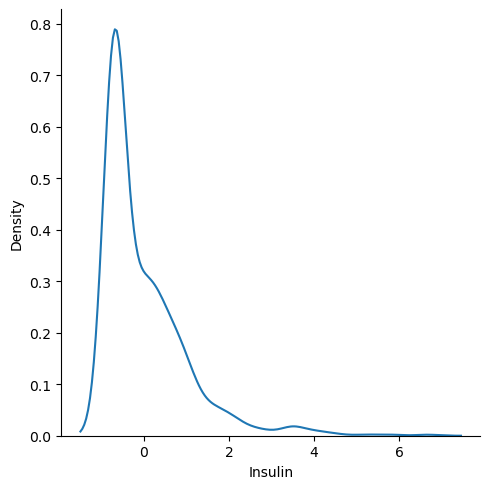

In [88]:
seaborn.displot(data=X, x='Insulin', kind='kde')
pyplot.show()

What's the difference between minmax and standard scaling?

In [90]:
X3

array([[ 0.14964075, -0.69289057],
       [-0.16054575, -0.69289057],
       [-0.26394125, -0.69289057],
       ...,
       [ 0.14964075,  0.27959377],
       [-0.47073225, -0.69289057],
       [ 0.04624525, -0.69289057]])

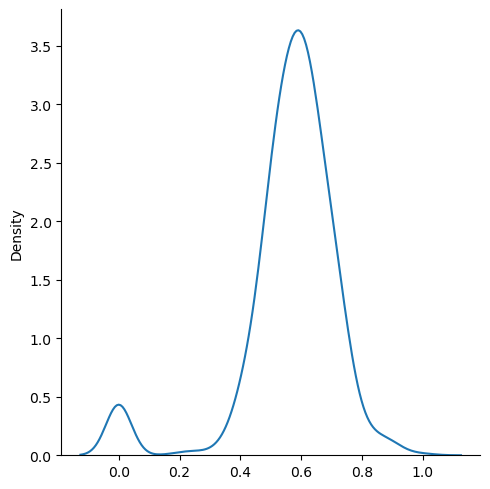

In [92]:
seaborn.displot(x=X2[:, 0], kind='kde')
pyplot.show()

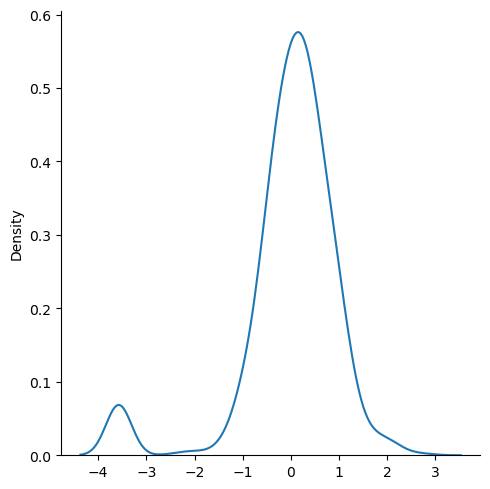

In [93]:
seaborn.displot(x=X3[:, 0], kind='kde')
pyplot.show()

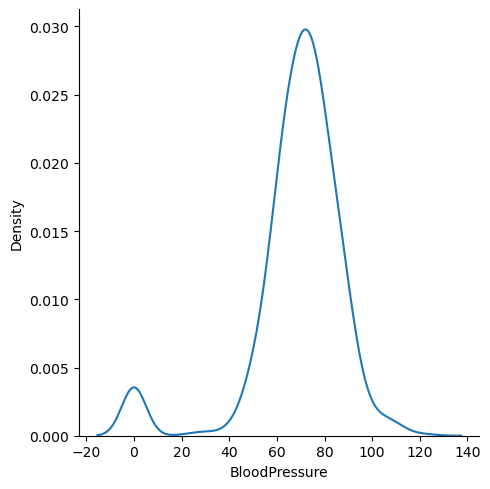

In [94]:
seaborn.displot(x=diabetes['BloodPressure'], kind='kde')
pyplot.show()